Diodes
===
The current generated by in pn-diode due irradiation is related to the incident flux by

$$
\begin{equation}
\begin{split}
\color{red}{I(A)}=&\sum_{i,j}P_{i,j}(W)R_{j}(A/W)+D(A)\\
P_{i,j}(W)=&\color{red}{I_{i,j}(Hz)}E_{j}(\text{keV})\\
R_{j}(A/W)=&\frac{e(C)}{E_{h}(\text{keV})}[1-e^{-\mu(E_{j})\rho d}]
\end{split}
\end{equation}
$$

where P the incident power, R the spectral responsivity, D the dark current, $E_i$ the energy of the incident photon, $E_j$ the energy of the detected photon, $E_{h}$ the energy to create an electron-hole pair, $I_{i,j}$ the detected flux of line $j$ due to line $i$ and diode density $\rho$, mass attenuation coefficient $\mu$ and thickness $d$.

$$
\begin{equation}
\color{red}{I_{i,j}}=I_{0} Y_{i,j} = \color{red}{I_{s}}\frac{Y_{i,j}}{\sum_k w_k T_{s}(E_{k})}
\end{equation}
$$

where $I_0$ the total flux before detection, $I_s$ the total flux seen by the sample, $T_s$ the "transmission" between point of detection and sample and $w_k$ the fraction of primary photons with energy $E_{k}$. The conversion factor $Y_{i,j}$ can be simply $w_i$ in case of direct detection or it can be the product of $w_i$ with solid angle and fluorescence/scattering rate in case of indirect detection. The relationship between flux reaching the sample and measured current can be summarized as

$$
\begin{equation}
\begin{split}
\color{red}{I(A)}=&\color{red}{I_{s}(Hz)}C_s(C)+D(A)\\
C_s(C) =& \frac{\sum_{i,j} Y_{i,j}C_j}{\sum_k w_k T_{s}(E_{k})}\\
C_j(C) =& E_{j}(\text{keV})\frac{e(C)}{E_{h}(\text{keV})}[1-e^{-\mu(E_{j})\rho d}]\\
\end{split}
\end{equation}
$$

where $C_s$ the charge generated per photon reaching the sample and $C_j$ the charge generated per photon reaching the diode.

Finally in order to allow a fast read-out, current is converted to frequency by an oscillator

$$
\begin{equation}
\color{red}{I(\text{Hz})}=\frac{F_{\text{max}}(Hz)}{V_{\text{max}}(V)}
\frac{V_{\text{max}}(V)}{I_{\text{max}}(A)}\color{red}{I(A)}+F_{0}(Hz)
\end{equation}
$$

where $F_{\text{max}}$ the maximal frequency that can be detected, $F_{0}$ a fixed offset, $V_{\text{max}}$ the maximal output voltage of the ammeter and input voltage of the oscillator, $\frac{V_{\text{max}}(V)}{I_{\text{max}}(A)}$ the "gain" of the ammeter.

Absolute diode
--------------
An absolute diode has a spectral responsivity $R(A/W)$ which behaves as theoretically expected

/users/denolf/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


PN-diode:
 Ionization energy = 3.67655290856 eV
 Material = Si (0.00278059871276 cm)
Beam filters: None
Attenuators: None
 Current:
 Gain = 1.000000e+05 volt / ampere
 Dark current = 0 ampere
Secondary target:
 None
Optics:
 None
Before sample: False
Voltage-to-Frequency:
 None


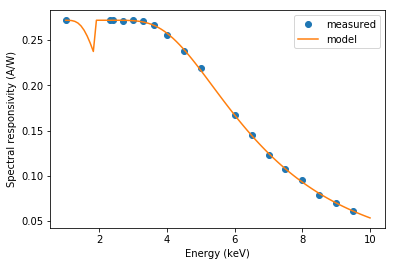

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from spectrocrunch.detectors import diode
det = diode.factory("sxm_ptb")
print(det)

det.model = False
energy = det.menergy
R = det.spectral_responsivity(energy)
plt.plot(energy,R,marker='o',linestyle="",label='measured')

det.model = True
energy = np.linspace(1,10,100)
R = det.spectral_responsivity(energy)
plt.plot(energy,R,label='model')

plt.legend()
plt.xlabel('Energy (keV)')
plt.ylabel('Spectral responsivity (A/W)')
plt.show()

Calibrated diode
----------------
The spectral responsivity $R(A/W)$ of a calibrated diode is determined by the difference in response with an absolute diode

PN-diode:
 Ionization energy = 3.66856052632 eV
 Material = Si (0.022 cm)
Beam filters: None
Attenuators: None
 Current:
 Gain = 1.000000e+05 volt / ampere
 Dark current = 1.08e-10 ampere
Secondary target:
 None
Optics:
 None
Before sample: False
Voltage-to-Frequency:
 y hertz = 1.000000e+06 Hz/10 V * x V + 32 Hz


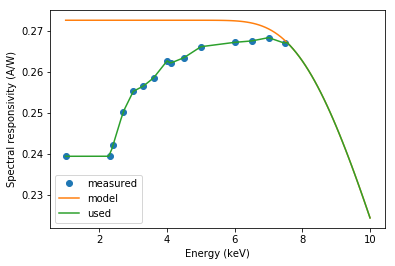

In [2]:
det = diode.factory("sxm_idet")
print(det)

det.model = False
energy = det.menergy
R = det.spectral_responsivity(energy)
plt.plot(energy,R,marker='o',linestyle="",label='measured')

det.model = True
energy = np.linspace(1,10,100)
R = det.spectral_responsivity(energy)
plt.plot(energy,R,label='model')

det.model = False
R = det.spectral_responsivity(energy)
plt.plot(energy,R,label='used')

plt.legend(loc='best')
plt.xlabel('Energy (keV)')
plt.ylabel('Spectral responsivity (A/W)')
plt.show()

Direct detection
------------------
Whenever $Y_{i,j}=w_i$ and $T_s=1$ we consider the diode to measure $I_s$ directly. The relationship between flux $\color{red}{I_s(Hz)}$ and diode response $\color{red}{I(Hz)}$ can be calculated:

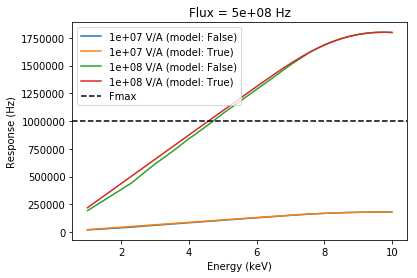

In [33]:
Is = 5e8
energy = np.linspace(1,10,100)

for gain in [1e7,1e8]:
    for model in [False,True]:
        det.setgain(gain)
        det.model = model
        I = [det.fluxtocps(en,Is).to("Hz").magnitude for en in energy]
        plt.plot(energy,I,label="{:.0e} V/A (model: {})".format(gain,model))

plt.gca().axhline(y=det.oscillator.Fmax.to("Hz").magnitude,label="Fmax",\
                  color='k',linestyle='--')

plt.title("Flux = {:.0e} Hz".format(Is))
plt.legend(loc='best')
plt.xlabel('Energy (keV)')
plt.ylabel('Response (Hz)')
plt.show()

Indirect detection
------------------

The conversion factors $Y_{i,j}$ can be calculated from the cross-sections of the secondary target ($Y_{i,j}=w_i$ when "simplified"). When the indirect diode measures the flux downstream from the optics (or there are no optics at all), $T_s=1$ and the relationship between flux and measured count-rate is known:

Source:
 Linear degree of polarization = 0.95 
 Phase retardation = 90.0 deg
PN-diode:
 Ionization energy = 3.66856052632 eV
 Material = Si (0.1 cm)
Beam filters: None
Attenuators: None
 Current:
 Gain = 1.000000e+07 volt / ampere
 Dark current = 0 ampere
Secondary target (only transmission):
 Multilayer (ordered top-bottom):
 Layer 0. 0.5 um (Ti)
 Layer 1. 0.5 um (silicon nitride)
Optics:
 KB transmission: 100%
Before sample: True
Voltage-to-Frequency:
 y hertz = 1.000000e+06 Hz/10 V * x V + 247 Hz
Geometry:
 In = 62 deg
 Out = 49 deg (reflection)
 Solid angle = 4*pi*0.4 srad


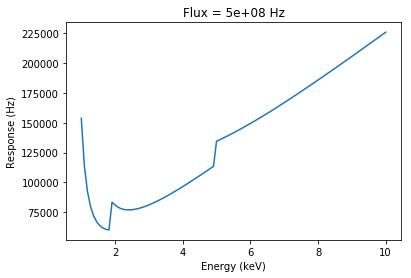

In [37]:
iodet = diode.factory("sxm_iodet1")
iodet.setgain(1e7)
iodet.simplifysecondarytarget = True # much faster
print(iodet.geometry)

Is = 5e8
energy = np.linspace(1,10,100)
I = [iodet.fluxtocps(en,Is).to("Hz").magnitude for en in energy]
plt.plot(energy,I)

plt.title("Flux = {:.0e} Hz".format(Is))
plt.xlabel('Energy (keV)')
plt.ylabel('Response (Hz)')
plt.show()

In case the indirect diode is upstream from the optics, transmission $T_s\neq 1$ and needs to be calibrated with a direct diode. This is done by measuring a changing flux at fixed energy, e.g. by scanning a series of attenuators. The flux is calculated from the direct diode and used to calibrated the indirect diode:

Source:
 Linear degree of polarization = 0.95 
 Phase retardation = 90.0 deg
PN-diode:
 Ionization energy = 3.66856052632 eV
 Material = Si (0.1 cm)
Beam filters: None
Attenuators: None
 Current:
 Gain = 1.000000e+08 volt / ampere
 Dark current = -4.91887660049e-09 ampere
Secondary target:
 Multilayer (ordered top-bottom):
 Layer 0. 0.5 um (Ti)
 Layer 1. 0.5 um (silicon nitride)
Optics:
 KB transmission:
 7 keV: 8.58836048154 %
Before sample: True
Voltage-to-Frequency:
 y hertz = 1.000000e+06 Hz/10 V * x V + 247 Hz
Geometry:
 In = 62 deg
 Out = 49 deg (reflection)
 Solid angle = 4*pi*0.4 srad


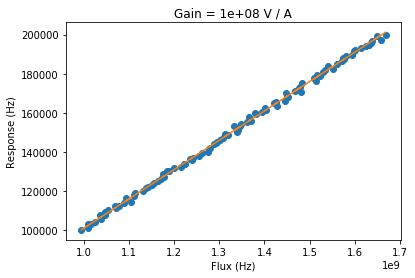

In [39]:
iodet.setgain(1e8)
iodet.simplifysecondarytarget = False

idet = diode.factory("sxm_idet")
idet.setgain(1e6)

energy = 7
idetresp = np.linspace(3e4,5e4,100)
flux = idet.cpstoflux(energy,idetresp)
fluxmeas = idet.cpstoflux(energy,np.random.poisson(idetresp))

iodetresp = np.random.poisson(np.linspace(1e5,2e5,100))
iodet.calibrate(iodetresp,fluxmeas,energy,caliboption="optics")
print(iodet.geometry)

plt.plot(fluxmeas,iodetresp,marker='o',linestyle="")
plt.plot(fluxmeas,iodet.fluxtocps(energy,fluxmeas))

plt.title("Gain = {:~.0e}".format(iodet.Rout))
plt.xlabel('Flux (Hz)')
plt.ylabel('Response (Hz)')
plt.show()